In [1]:
import pandas as pd
df = pd.read_csv("/home/aweiland/comparing_theories/5k_mol_stats.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,mol_id,atom_index,Shift,atom_type,num_atoms,xtb_rmsd,...,xtb_runtime,egret_runtime,egret_rmsd,egret_time,uma_time,uma_rmsd,r2scan_time,r2scan-3c_rmsd,B3LYP_time,B3LYP_rmsd
0,0,0,0,0,2192,0,108.4,6,57,0.567481,...,313.008,464.0,0.003635,464.0,6.0,0.001347,6251.17,0.331355,689.53,0.112193
1,1,1,1,1,2194,0,12.9,6,27,0.145308,...,206.791,373.0,0.002764,373.0,2.0,0.001143,812.51,0.033727,595.59,0.039446
2,2,2,2,2,2198,0,144.8,6,48,0.121894,...,129.533,278.0,0.001712,278.0,3.0,0.001064,4109.44,0.106159,247.86,0.060537
3,3,3,3,3,2202,1,69.4,6,40,0.200460,...,224.729,315.0,0.002875,315.0,4.0,0.001282,2879.94,0.044456,2479.13,0.125377
4,4,4,4,4,2203,1,69.0,6,29,0.197792,...,159.481,461.0,0.005081,461.0,3.0,0.001593,1322.37,0.084289,1239.67,0.073515


In [41]:
df["xtb_coretime"] = df["xtb_runtime"] * 16 / 60
df["egret_coretime"] = df["egret_runtime"] / 60
df["r2scan_coretime"] = df["r2scan_time"] * 16 / 60
df["B3LYP_coretime"] = df["B3LYP_time"] * 16 / 60
df["uma_coretime"] = df["uma_time"] / 60

In [38]:
mean = df[["xtb_coretime", "egret_coretime", "uma_coretime", "r2scan_coretime", "B3LYP_coretime"]].mean()

mean_df = mean.reset_index()
mean_df.columns = ["theory", "mean_value"]
aimnet_row = pd.DataFrame([{
    "theory": "AIMNET",
    "mean_value": 0.0546
}])

mean_df = pd.concat([mean_df, aimnet_row], ignore_index=True)



label_map = {
    'xtb_coretime': 'xTB',
    "egret_coretime": "Egret-1",
    "uma_coretime": "UMA",
    "r2scan_coretime": "r2scan-3c",
    "B3LYP_coretime": "B3LYP/def2-TZVP",
    "AIMNET": "AIMNET (GPU)"
    
}
mean_df['theory'] = mean_df['theory'].map(label_map)



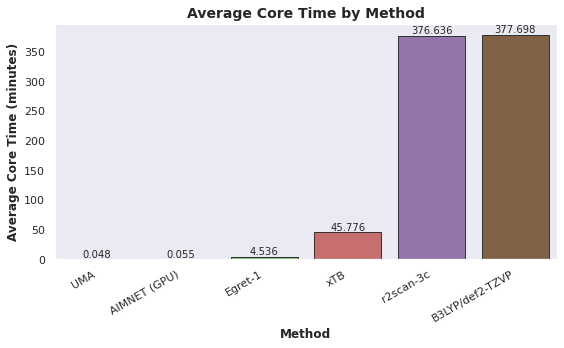

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the mean_df by mean_value
mean_df_sorted = mean_df.sort_values("mean_value", ascending=True)

plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")

# Create barplot
ax = sns.barplot(data=mean_df_sorted, x="theory", y="mean_value", palette="muted", edgecolor=".2")

# Add labels above bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # x position
        height + 0.002,                      # y position (slightly above bar)
        f"{height:.3f}",                     # label text, 3 decimal places
        ha='center', va='bottom', fontsize=10
    )

# Labels and formatting
plt.xlabel("Method", fontsize=12, weight='bold')
plt.ylabel("Average Core Time (minutes)", fontsize=12, weight='bold')
plt.title("Average Core Time by Method", fontsize=14, weight='bold')

plt.xticks(rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


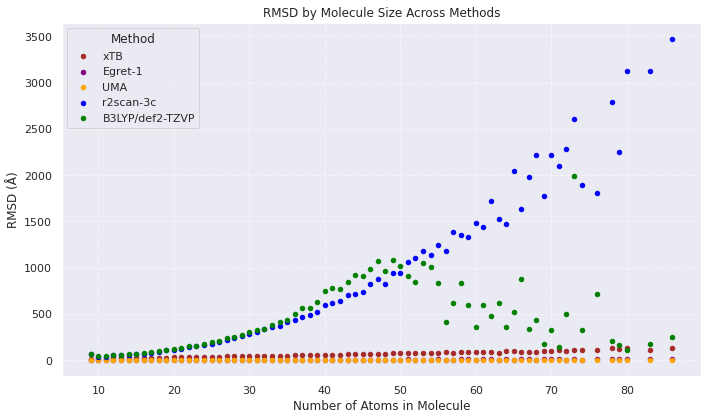

In [44]:
run_time = ["xtb_coretime", "egret_coretime", "uma_coretime", "r2scan_coretime", "B3LYP_coretime"]

colors = ["brown", "purple", "orange", "blue", "green", "red"]

label_map = {
    'xtb_coretime': 'xTB',
    'aimnet_coretime': 'AIMNET',
    "egret_coretime": "Egret-1",
    "uma_coretime": "UMA",
    "r2scan_coretime": "r2scan-3c",
    "B3LYP_coretime": "B3LYP/def2-TZVP"
}

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each method
for method, color in zip(run_time, colors):
    avg_by_size = df.groupby("num_atoms")[method].mean()
    ax.scatter(avg_by_size.index, avg_by_size.values, label=label_map[method], color=color, s=20)

# Customize plot
ax.legend(title="Method")
plt.xlabel("Number of Atoms in Molecule")
plt.ylabel("RMSD (Å)")
plt.title("RMSD by Molecule Size Across Methods")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
